In [1]:
import csv
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ls

2017_fall/                             Stata MP 14.1 macOS/
2018_spring/                           dailykos_data.ipynb
2018_winter/                           dkos 18.csv
Jerbs/                                 old grad school essay.docx
Loans/                                 special-elections.csv
Misc/                                  summer2018/
R Script/                              ~$nlyons_summerfunding_statement.docx


In [3]:
dfile = 'dkos 18.csv'
dfile2 = 'special-elections.csv'

In [4]:
df = pd.read_csv(dfile,parse_dates=True,date_parser='date')
df538 = pd.read_csv(dfile2, parse_dates=True)

In [5]:
df.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,1-May-18,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,1-May-18,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,24-Apr-18,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,24-Apr-18,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,24-Apr-18,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [6]:
df['date']=pd.to_datetime(df538['date'], infer_datetime_format=True)
df538['edu_x_inc'] = df538['%_bach_degree']*df538['median_inc']
df538.head()

,date,state,istrict,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,edu_x_inc
0,3/27/18,Alabama,HD-21,65548.0,0.42,0.06,0.24,27530.16
1,3/13/18,Pennsylvania,18th CD,62283.0,0.35,-0.03,0.22,21799.05
2,3/13/18,Tennessee,SD-14,48252.0,0.22,-0.08,0.01,10615.44
3,3/6/18,Oklahoma,HD-51,57202.0,0.18,-0.08,0.21,10296.36
4,2/27/18,Kentucky,HD-89,37858.0,0.16,-0.05,0.29,6057.28


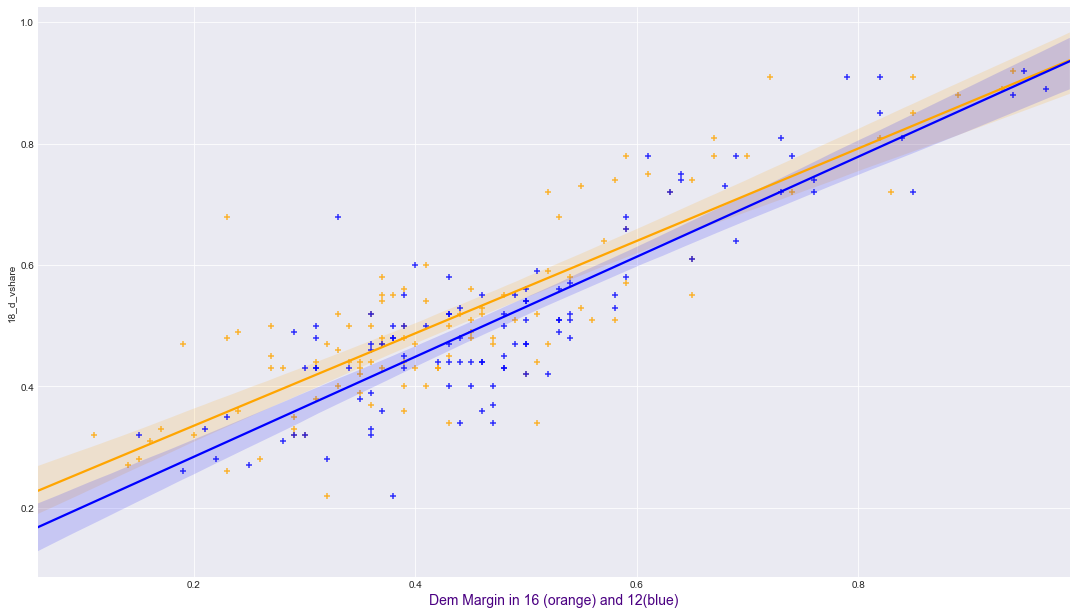

In [19]:
sns.regplot(x='16_clinton', y='18_d_vshare', data=df, color='orange', scatter=True, marker='+', order=1)
sns.regplot(x='12_obama', y='18_d_vshare', data=df, color='blue', scatter=True, marker='+', order=1)
plt.xlabel('Dem Margin in 16 (orange) and 12(blue)', fontsize=14, color='indigo')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

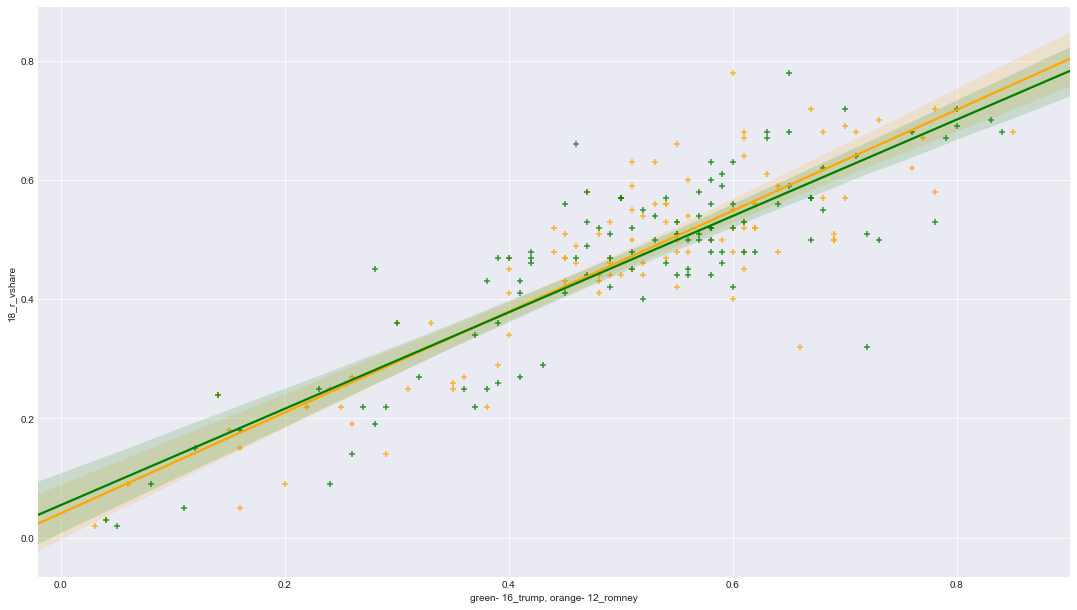

In [18]:
sns.regplot(x='12_romney', y='18_r_vshare', data=df, color='orange', scatter=True, marker='+', order=1)
sns.regplot(x='16_trump', y='18_r_vshare', data=df, color='green', scatter=True, marker='+', order=1)
plt.xlabel('green- 16_trump, orange- 12_romney')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

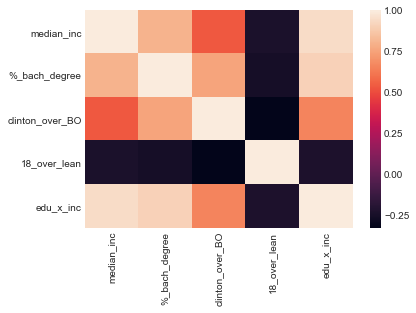

In [9]:
df538.corr()
sns.heatmap(df538.corr())

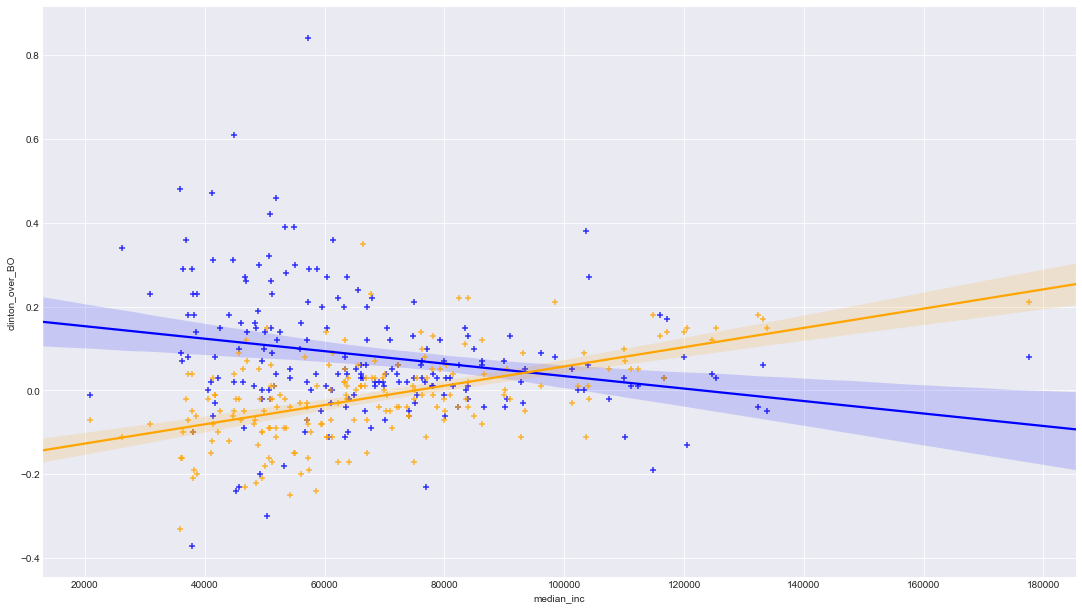

In [17]:
sns.regplot(x='median_inc', y='18_over_lean', data=df538, color='b', scatter=True, marker='+', order=1)
sns.regplot(x='median_inc', y='clinton_over_BO', data=df538, color='orange', scatter=True, marker='+', order=1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


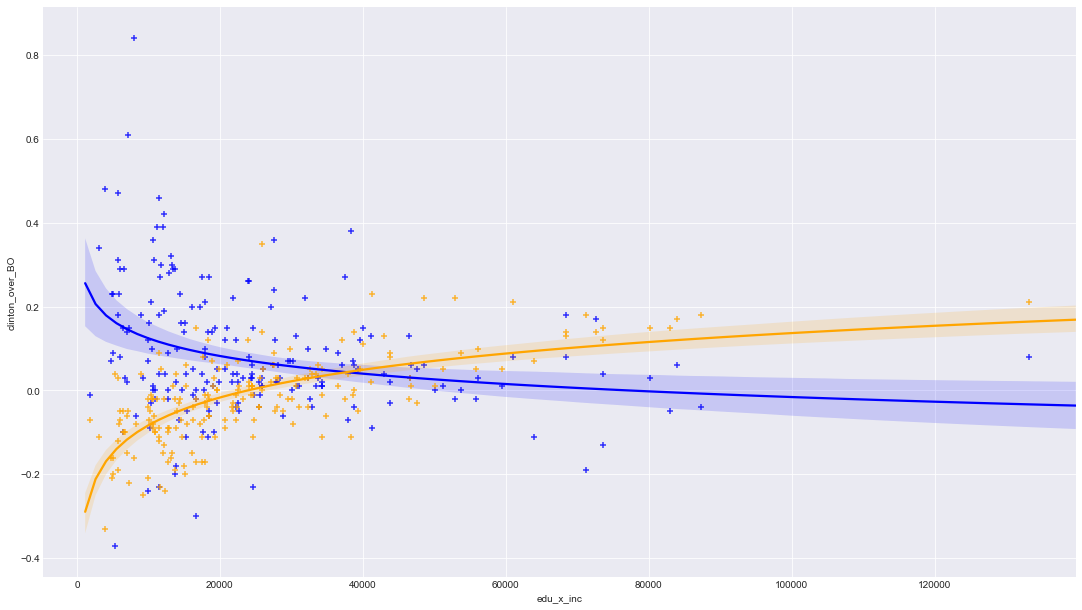

In [11]:
sns.regplot(x='edu_x_inc', y='18_over_lean', data=df538, color='b', scatter=True, marker='+', order=1, logx=True)
sns.regplot(x='edu_x_inc', y='clinton_over_BO', data=df538, color='orange', scatter=True, marker='+', order=1, logx=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

                 median_inc  %_bach_degree  clinton_over_BO  18_over_lean  \
median_inc         1.000000       0.806168         0.536792     -0.232219   
%_bach_degree      0.806168       1.000000         0.756719     -0.253885   
clinton_over_BO    0.536792       0.756719         1.000000     -0.326621   
18_over_lean      -0.232219      -0.253885        -0.326621      1.000000   
edu_x_inc          0.943468       0.908359         0.658360     -0.226237   

                 edu_x_inc  
median_inc        0.943468  
%_bach_degree     0.908359  
clinton_over_BO   0.658360  
18_over_lean     -0.226237  
edu_x_inc         1.000000  


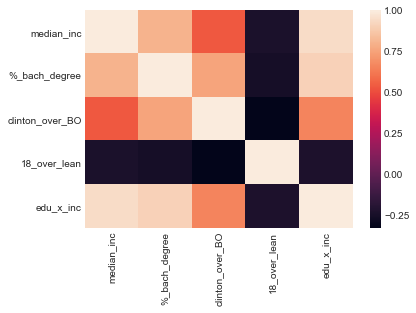

In [12]:
print(df538.corr())
sns.heatmap(df538.corr())

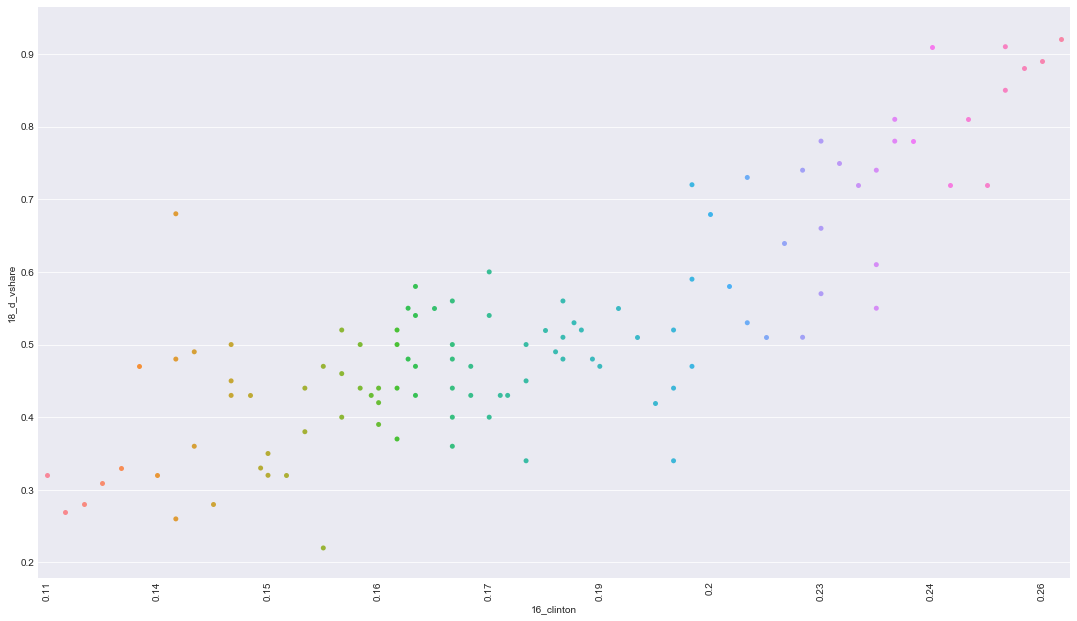

In [23]:
sns.swarmplot(x='16_clinton' , y='18_d_vshare' , data=df)
plt.xticks(rotation='vertical', )
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

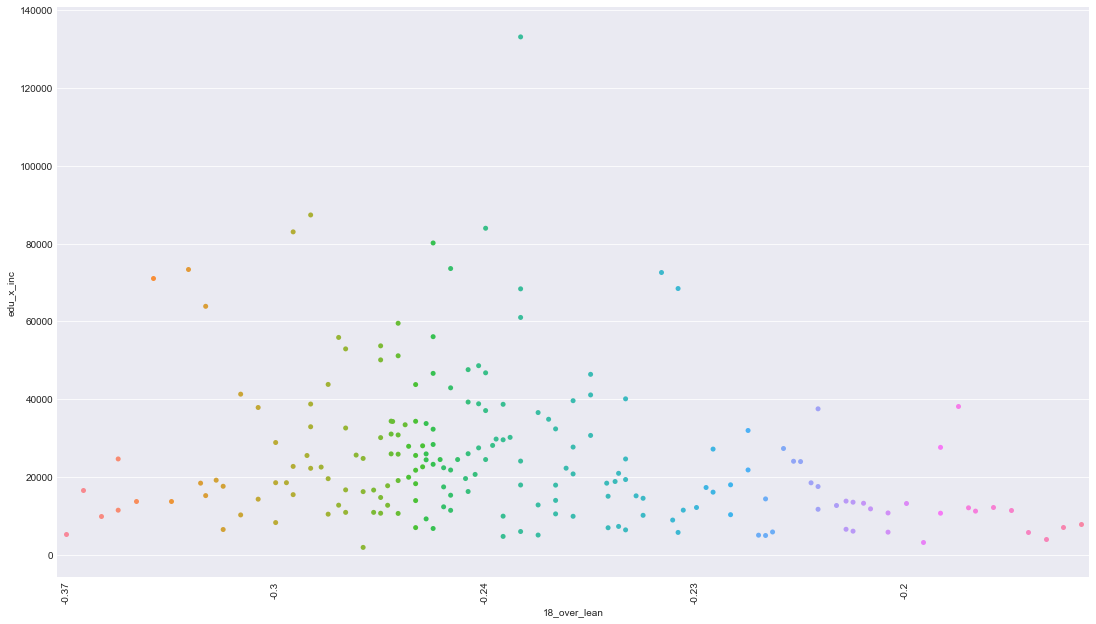

In [25]:
sns.swarmplot(x='18_over_lean' , y='edu_x_inc' , data=df538)
plt.xticks(rotation='vertical')

plt.locator_params(axis='x', nbins=5, tight=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [20]:
df.District[0:5]

0     HD-39
1    HD-114
2     AZ-08
3     SD-32
4     SD-37
Name: District, dtype: object

In [21]:
df538.istrict[0:5]

0      HD-21
1    18th CD
2      SD-14
3      HD-51
4      HD-89
Name: istrict, dtype: object